****************************************************************************
* @file: Robots.py
* @project: ROBOFEI-HT - FEI 😛
* @author: Vinicius Nicassio Ferreira
* @version: V0.0.1
* @created: 23/10/2017
* @e-mail: vinicius.nicassio@gmail.com
* @brief: Class Robots
****************************************************************************

In [1]:
#ini-iPython

# Executando no diretório principal

In [2]:
import os
os.chdir('../../') #Executando no diretório principal
os.system("cd Workbench/ && ./zerar.sh && cd ..")
os.system("cd Workbench/iPython/ && ./convertendo.sh && cd ../../")
import sys
sys.path.append('./include')
sys.path.append('./src')
sys.path.append('./Workbench/iPython')
#end-iPython

---- Imports ----

In [3]:
# The standard libraries used in the vision system.


In [4]:
# The standard libraries used in the vision system.
import cv2 # OpenCV library used for image processing.
from sklearn.externals import joblib # Reading data recorded by sklearn.

In [5]:
# Used class developed by RoboFEI-HT.
%matplotlib inline
import matplotlib.pyplot as plt
#ini-iPython - Utilizado para o iPython reconhecer as classes
sys.path.append('/home/vinicius/models/research')
sys.path.append('/home/vinicius/models/research/object_detection')
#end-iPython
from DNN import * # Class that implements object detection using a deep neural network (DNN).
from ColorSegmentation import * # Class responsible for color segmentation.
#ini-iPython - Usando Classe BasicThread como instanciação
os.system("sed -i '/@abstractmethod/d' ./Workbench/iPython/BasicThread.py")
os.system("sed -i '/__metaclass__/d' ./Workbench/iPython/BasicThread.py")
#end-iPython
from BasicThread import * # Responsible for implementing the methods and variables responsible for managing the thread.

In [6]:
#ini-iPython - Preparando dados para analizar

In [7]:
def plot(img):
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img)
    plt.grid()
    plt.show()

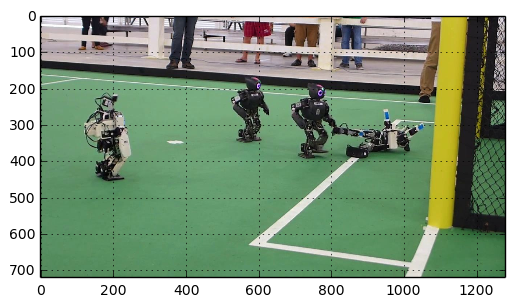

In [8]:
image = cv2.imread("/home/vinicius/Dropbox/Projeto Mestrado/Codigos/RoboFEI-HT_Debug/AI/Vision/Workbench/iPython/cop.jpg")
plot(image)

In [9]:
class argumentos:
    camera = False
    dnn = False
    train = False
    robots = True

a = argumentos()

classific = DNN(a)

DNN - PARAMETERS section not found!


In [10]:
observation = {}
observation['frame'] = image.copy()
observation['time'] = 0.0
observation['pos_tilt'] = 0
observation['pos_pan'] = 0

observation['objects'] = classific.detect(observation)
observation['objects']

,classes,scores,boxes
0,robot,0.999981,"[0.253121912479, 0.54118680954, 0.55077278614,..."
1,robot,0.999932,"[0.300280451775, 0.0986121892929, 0.6364863514..."
2,robot,0.985885,"[0.234081655741, 0.408912748098, 0.49705877900..."
3,robot,0.972327,"[0.364523023367, 0.636203587055, 0.54877269268..."


In [11]:
#end-iPython

# Class Robots
doxygen-iPython

In [12]:
#des-iPython class Robots(BasicThread):
#ini-tab -> Iniciando código classe
'''Class responsible for detecting thefts and a time of classification they belong.'''

'Class responsible for detecting thefts and a time of classification they belong.'

---- Variables ----

In [13]:
#ini-iPython

# ------- Lista de funções -------

#self-iPython __teamDetection
#self-iPython __cutObject
#self-iPython run
#self-iPython __classification
#self-iPython __estimatedDistance
#self-iPython __writeBlackboard
#self-iPython finalize
#self-iPython classifyingRobots

#end-iPython - Fim listas

# listdata
doxygen-iPython

In [14]:
__listdata = [ ] #self-iPython __listdata

# menu
doxygen-iPython

In [15]:
__menu = 'show' #self-iPython __menu

# lastupdate
doxygen-iPython

In [15]:
__lastupdate = -1 #self-iPython __lastupdate

# filename
doxygen-iPython

In [16]:
__filename = './Data/distance_network.sav' #self-iPython __filename

# finalize
.
doxygen-iPython

In [17]:
#eself-iPython finalize
#edes-iPython def finalize(self):
def finalize( ):
    '''Closes the process and saves changes.'''
    #self-iPython __teams
    #des-iPython self._finalize()
    if self._args.robots == True:
        cv2.destroyAllWindows()
    
    for team in __teams:
        team._end()
    self._end() #self-iPython finalize

# Constructor Class
doxygen-iPython

In [18]:
#des-iPython def __init__(self, a):
#ini-tab -> Criando construtor
'''Initialize the class and instantiate the objects needed to detect the robots.
@param a Entry Parameters of the vision system.'''
#edes-iPython super(Robots, self).__init__(a, 'Robots', 'Parameters')
self = BasicThread(a, 'Robots', 'Parameters')

#self-iPython __parameters
__parameters = {
    "percentage_time_color": 10,
}

__parameters = self._conf.readVariables(__parameters)

__teams = []
__teams.append(ColorSegmentation("Cyano", a, False))
__teams.append(ColorSegmentation("Magenta", a, False))

#self-iPython __nndistance
__nndistance = joblib.load(__filename)

#Clear blackboard
for number in xrange(1,22):
    self._bkb.write_int("VISION_RB" + str(number).zfill(2) + "_TAG", 0)

#des-iPython self.start()

ROBOTS - PARAMETERS section not found!


In [19]:
#end-tab -> Finalizando construtor

In [20]:
#ini-iPython

## Teste construtor

In [21]:
finalize()
#end-iPython

# cutObject
doxygen-iPython

In [22]:
#eself-iPython __cutObject
#edes-iPython def __cutObject(self, index, data):
def __cutObject(index, data):
    '''Returns the cutoff window in the uploaded index image.
    @param index Position of the date that will be used to create the window cut.
    @param data Data used to perform image cropping.
    @return Returns a vector with the frame to be cut.'''
    return np.array(
        data["objects"]["boxes"].values[index] * np.array(
            data["frame"].shape[:2] + data["frame"].shape[:2]
        ),
        dtype = int
    ) #self-iPython __cutObject

In [23]:
#ini-iPython

## Teste cutObject

In [27]:
__cutObject(0, observation)
#end-iPython

array([182, 692, 396, 811])

# teamDetection
doxygen-iPython

In [43]:
#eself-iPython __teamDetection
#edes-iPython def __teamDetection(self, data):
def __teamDetection(data):
    global __menu #debug-iPython
    '''Detects which team belongs to the robot.
    @param data Data that will be analyzed for the detection of teams.
    @return Returns a DataFrame with the teams.'''
    time_robot = []
    for i in xrange(len(data["objects"])):
        xmin, ymin, xmax, ymax = __cutObject(i, data)            
#         plot(data["frame"][xmin:xmax, ymin:ymax, :]) #debug-iPython
        maxcolor = -1
        time = 0
        for j in xrange(len(__teams)):
            if self._args.robots == True and __menu == 'setcolor':
                __teams[j].show = True
                while True:
                    mask = __teams[j].segmentation(
                        data["frame"][xmin:xmax, ymin:ymax, :]
                    )
                    if cv2.waitKey(1) == ord('q'):
#                         cv2.destroyWindow(__teams[j].color + ' Segmentation')
                        break
                __teams[j].show = False
            else:
                mask = __teams[j].segmentation(
                    data["frame"][xmin:xmax, ymin:ymax, :]
                )
#             plot(mask) #debug-iPython
            area = sum(sum(mask))*100.0/((xmax - xmin)*(ymax - ymin)) 
#             print "area:", area #debug-iPython
            if area >= __parameters["percentage_time_color"] and maxcolor < area:
                maxcolor = area
                time = j*2 - 1
#         print "Robo pertence ao time", time #debug-iPython
        time_robot.append(time)
#     print "Times robos:", time_robot #debug-iPython
    data["objects"]["time"] = np.array(time_robot)
#     print  "data:\n", data["objects"] #debug-iPython
    return data #self-iPython __teamDetection

In [44]:
#ini-iPython

## Teste teamDetection

In [46]:
__teamDetection(observation)
finalize()
observation["objects"]
#end-iPython

,classes,scores,boxes,time,dist
0,robot,0.999981,"[0.253121912479, 0.54118680954, 0.55077278614,...",-1,"[1.93716144248, -0.15411560806]"
1,robot,0.999932,"[0.300280451775, 0.0986121892929, 0.6364863514...",-1,"[1.82391969667, 0.604296923974]"
2,robot,0.985885,"[0.234081655741, 0.408912748098, 0.49705877900...",-1,"[2.42139986625, 0.110276928848]"
3,robot,0.972327,"[0.364523023367, 0.636203587055, 0.54877269268...",-1,"[3.38006085403, -0.715677939195]"


# estimatedDistance
doxygen-iPython

In [31]:
#eself-iPython __estimatedDistance
#edes-iPython def __estimatedDistance(self, data):
def __estimatedDistance(data):
    '''Estimate the distance of the object using neural network.
    @param data Data to be used for analysis.
    @return Returns the increased distance data of the objects.'''
    listdist = []
    i = 0 #debug-iPython
    print "" #debug-iPython
    for ymin, xmin, ymax, xmax in data['objects']['boxes']:
        print "robo", i #debug-iPython
        i += 1 #debug-iPython
#         print "\nsize:", ymax - ymin #debug-iPython
        print "dist:", __nndistance.predict(ymax - ymin)[0] #debug-iPython
#         print "pos:", (xmax + xmin)/2 #debug-iPython
#         print "Ângulo:", 0.9075712110370513*(0.5 - (xmax + xmin)/2) #debug-iPython

        print"xdist:", np.cos(0.9075712110370513*(0.5 - (xmax + xmin)/2))*__nndistance.predict(ymax - ymin)[0] #debug-iPython
        print"ydist:", np.sin(0.9075712110370513*(0.5 - (xmax + xmin)/2))*__nndistance.predict(ymax - ymin)[0] #debug-iPython
        listdist.append([
            np.cos(0.9075712110370513*(0.5 - (xmax + xmin)/2))*__nndistance.predict(ymax - ymin)[0],
            np.sin(0.9075712110370513*(0.5 - (xmax + xmin)/2))*__nndistance.predict(ymax - ymin)[0]
        ])
        
    data['objects']['dist'] = listdist    
    return data #self-iPython __estimatedDistance

In [32]:
#ini-iPython

## Teste estimatedDistance

In [33]:
test = __estimatedDistance(observation)
test['objects']
#end-iPython


robo 0
dist: 1.94328229418
xdist: 1.93716144248
ydist: -0.15411560806
robo 1
dist: 1.92142078479
xdist: 1.82391969667
ydist: 0.604296923974
robo 2
dist: 2.42390971641
xdist: 2.42139986625
ydist: 0.110276928848
robo 3
dist: 3.45499729227
xdist: 3.38006085403
ydist: -0.715677939195


,classes,scores,boxes,time,dist
0,robot,0.999981,"[0.253121912479, 0.54118680954, 0.55077278614,...",1,"[1.93716144248, -0.15411560806]"
1,robot,0.999932,"[0.300280451775, 0.0986121892929, 0.6364863514...",1,"[1.82391969667, 0.604296923974]"
2,robot,0.985885,"[0.234081655741, 0.408912748098, 0.49705877900...",1,"[2.42139986625, 0.110276928848]"
3,robot,0.972327,"[0.364523023367, 0.636203587055, 0.54877269268...",1,"[3.38006085403, -0.715677939195]"


# __writeBlackboard
.
doxygen-iPython

In [47]:
#eself-iPython __writeBlackboard
#edes-iPython def __writeBlackboard(self, data):
def __writeBlackboard(data):
    number = 1    
    for __, __, __, robot, [xdist, ydist] in data['objects'].values:
        print robot, xdist, ydist #debug-iPython
        while number < 22 and self._bkb.read_int("VISION_RB" + str(number).zfill(2) + "_TAG") != 0:
            number += 1
        
        if number == 22: #Full memory
            print "Memoria Cheia" #debug-iPython
            break
        print "Salvou em", number #debug-iPython
        
        self._bkb.write_float("VISION_RB" + str(number).zfill(2) + "_X", xdist)
        self._bkb.write_float("VISION_RB" + str(number).zfill(2) + "_Y", ydist)
        self._bkb.write_double("VISION_RB" + str(number).zfill(2) + "_TIME", data['time']),
        self._bkb.write_int("VISION_RB" + str(number).zfill(2) + "_MOV", data['mov']),
        self._bkb.write_int("VISION_RB" + str(number).zfill(2) + "_TAG", robot + 2) #self-iPython __writeBlackboard

0.0

In [56]:
#ini-iPython

## Teste writeBlackboard

In [52]:
__writeBlackboard(observation)
#end-iPython

# __classification
doxygen-iPython

In [ ]:
#eself-iPython __classification
#edes-iPython def __classification(self, data):
def __classification(data):
    '''Sorting Detected Robots and Writing on Blackboard.'''
    global __menu #debug-iPython
    
    if __lastupdate > data['time']:
        return
    __lastupdate = data['time'] + 1
    
    __teamDetection(data)
    __estimatedDistance(data)
    __writeBlackboard(data)
    
    # Displaying parameter windows
    if self._args.robots == True:
        __menu = 'show'
        cv2.imshow(
            'Robots parameters',
            cv2.resize(
                data['frame'],
                None,
                fx=380.0/data['frame'].shape[0],
                fy=380.0/data['frame'].shape[0]
            )
        )
        keyboard = cv2.waitKey(1)
        if keyboard == ord('s'):
            __menu = 'setcolor'
        elif keyboard == ord('q'):
            self._running = False #self-iPython __classification

In [ ]:
#ini-iPython

## Teste __classification

In [ ]:
if self._args.robots == True:
    while True:
        del observation['objects']['time']
        try:
            __classification(observation)
        except:
            break
else:
    __classification(observation)

observation['objects']
#end-iPython

# classifyingRobots
doxygen-iPython

In [ ]:
#eself-iPython classifyingRobots
#edes-iPython def classifyingRobots(self, data):
def classifyingRobots(data):
    if self._running == False:
        raise VisionException(5, 'Robots')
    __listdata.append(data)
    self._resume() #self-iPython classifyingRobots

In [ ]:
#ini-iPython

## Teste classifyingRobots

In [ ]:

#end-iPython

# run
doxygen-iPython

In [ ]:
#eself-iPython run
#edes-iPython def run(self):
def run( ):
    '''Execution loop.'''
    self._running = True
    while self._running:
        with self._pausethread:
            while __listdata != []:
                data = __listdata.pop(0)
                __classification(data)
        self._pause( ) #self-iPython run

In [ ]:
#ini-iPython

## Teste run

In [ ]:

#end-iPython

In [ ]:
#end-tab -> Finalizando classe

In [ ]:
#ini-iPython

# nova_variavel
.
doxygen-iPython

In [ ]:
nova_variavel = None #self-iPython nova_variavel

# nova_funcao
.
doxygen-iPython

In [ ]:
# eself-iPython nova_funcao
# edes-iPython def nova_funcao(self, nova_variavel):
def nova_funcao(nova_variavel):
    pass # self-iPython nova_funcao

In [ ]:
#ini-iPython

## Teste nova_funcao

In [ ]:

#end-iPython

In [ ]:
#end-iPython